Task :- To Predict the math score of any given student based on the 5 categorical features and 2 other numeric features.

1) Split the data into X and Y variables 
2) Perform one hot encoding on the categorical data
2) Split the data into train and test sets
3) Create an evaluation function
4) Create the model
5) Train the model
6) Evaluate the model
7) Predict the output for any new data


In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

1) Divide the data into X and Y

In [3]:
df = pd.read_csv('data/data.csv')


X = df.drop(columns=['math_score'], axis=1)
Y = df['math_score']

2) Perform one hot encoding on the categorical data


    Create a pipeline to perform the one hot encoding because it will include more than one operations to be performed one after another

    2.a) Get different features from the data

In [4]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

    2.b) Import the encoder and standard scaler

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

    2.c) Initialize Both Encoder and Sacaler

In [7]:
num_transformer = StandardScaler()
one_hot_transformer =  OneHotEncoder()

    2.d) Combine both and create a pipeline 

In [8]:
preprocessor = ColumnTransformer([
    ("OneHotEncoder", one_hot_transformer, cat_features),
    ("StandardScaler", num_transformer, num_features)
])

3) Apply the preprocessor on the dataset

In [9]:
X = preprocessor.fit_transform(X)

4) Split the data into train and test

In [18]:
from sklearn.model_selection import train_test_split

X_train,  X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print(np.shape(X_train))
print(np.shape(Y_train))

(800, 19)
(800,)


5) Create the evaluation function

In [23]:
def model_evaluation(y_true, y_predicted):
    mae = mean_absolute_error(y_true, y_predicted)
    mse = mean_squared_error(y_true, y_predicted)
    rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
    r2_square = r2_score(y_true, y_predicted)

    return mae, rmse, r2_square

6) Create and evaluate all the models in a list

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.4227
- Mean Absolute Error: 4.3291
- R2 Score: 0.8695
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0877
- Mean Absolute Error: 3.9818
- R2 Score: 0.8945


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6245
- Mean Absolute Error: 5.2418
- R2 Score: 0.8053
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4650
- Mean Absolute Error: 5.0935
- R2 Score: 0.8297


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.4001
- Mean Absolute Error: 4.3195
- R2 Score: 0.8706
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0657
- Mean Absolute Error: 3.9876
- R2 Score: 0.8954


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9096
- Mean Absolute Error: 4.6985
- R2 Score: 0.8450
-----------------------

7) List down the results of all models as a table

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.895447
0,Linear Regression,0.894536
7,CatBoosting Regressor,0.876273
5,Random Forest Regressor,0.853835
8,AdaBoost Regressor,0.840551
6,XGBRegressor,0.840409
1,Lasso,0.829706
3,K-Neighbors Regressor,0.805870
4,Decision Tree,0.752093


7) Looking at the results of linear regression

In [27]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 89.45


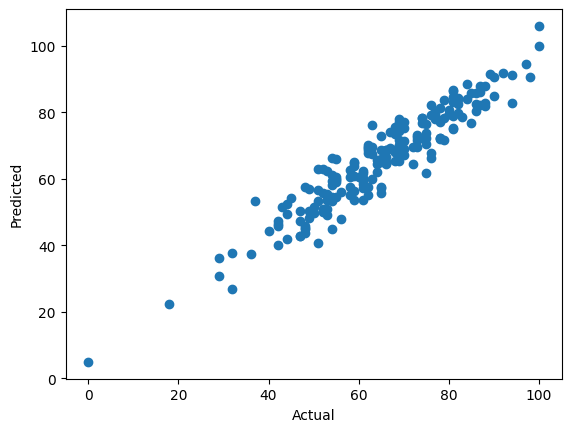

In [29]:
plt.scatter(Y_test,Y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

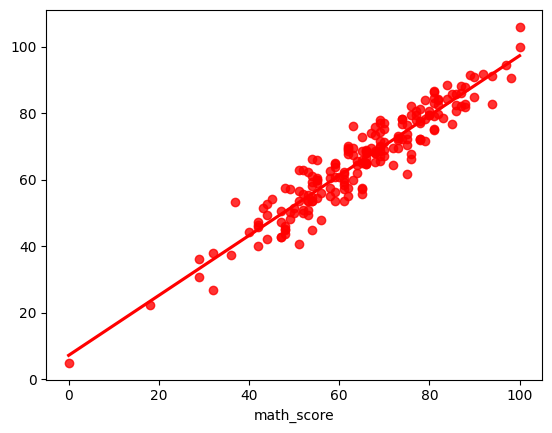

In [31]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color ='red');

In [32]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
507,55,59.871094,-4.871094
818,60,60.714844,-0.714844
452,65,64.957031,0.042969
368,44,49.519531,-5.519531
242,56,47.925781,8.074219
...,...,...,...
430,64,64.445312,-0.445312
874,43,51.621094,-8.621094
550,79,71.738281,7.261719
608,61,61.652344,-0.652344
